## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [87]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [88]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp_path = Path('./Resources/bitstamp.csv')
bitstamp = pd.read_csv(
    bitstamp_path,
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [89]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [90]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase_path = Path('./Resources/coinbase.csv')
coinbase = pd.read_csv(
    coinbase_path,
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True)

In [91]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [92]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame

bitstamp = bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [93]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].str.replace("$","")

C:\Users\jpmad\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  



### Step 3: Convert the data type of the Close column to a `float`.

In [94]:
# Convert the Close data type to a float
bitstamp.loc[:,'Close'] = bitstamp.loc[:,'Close'].astype(float)

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [95]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [96]:
# Repeat Steps 1–4 for the coinbase DataFrame
coinbase = coinbase.dropna()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


In [97]:
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].str.replace("$","")

C:\Users\jpmad\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [98]:
coinbase.loc[:,'Close'] = coinbase.loc[:,'Close'].astype(float)

In [99]:
coinbase.duplicated().sum()

0

In [100]:
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


In [101]:
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

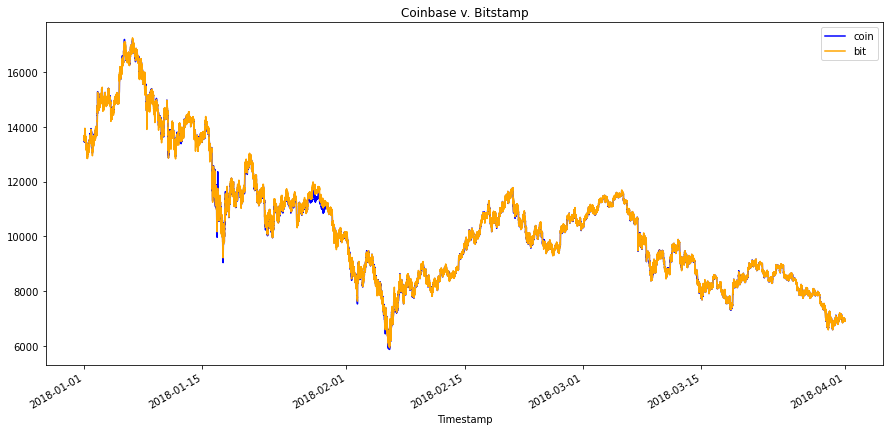

In [103]:
coinbase['Close'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="coin")
bitstamp['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [180]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc["2018-01-15 00:00:00":"2018-02-01 00:00:00", "Close"]

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-15 00:00:00    13618.73
2018-01-15 00:01:00    13639.78
2018-01-15 00:02:00    13657.88
2018-01-15 00:03:00    13639.92
2018-01-15 00:04:00    13659.00
Name: Close, dtype: float64

In [181]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc["2018-01-15 00:00:00":"2018-02-01 00:00:00", "Close"]

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-15 00:00:00    13620.02
2018-01-15 00:01:00    13620.02
2018-01-15 00:02:00    13620.00
2018-01-15 00:03:00    13621.33
2018-01-15 00:04:00    13621.49
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [182]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    24417.000000
mean     11370.325590
std        895.366265
min       9222.000000
25%      10892.400000
50%      11280.000000
75%      11706.110000
max      14369.980000
Name: Close, dtype: float64

In [183]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    24459.000000
mean     11326.387056
std        887.852438
min       9045.610000
25%      10880.010000
50%      11238.880000
75%      11601.010000
max      14253.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

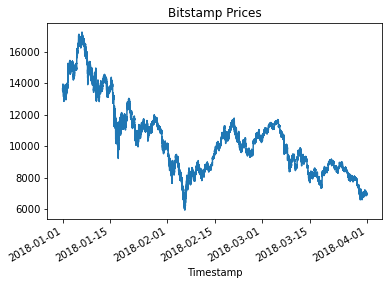

In [184]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(title='Bitstamp Prices', xlabel="Timestamp")

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

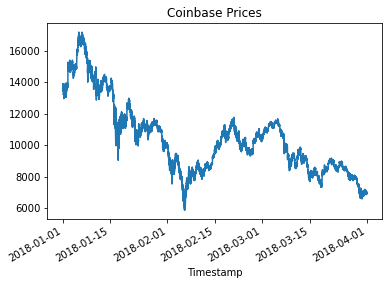

In [185]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(title='Coinbase Prices', xlabel="Timestamp")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

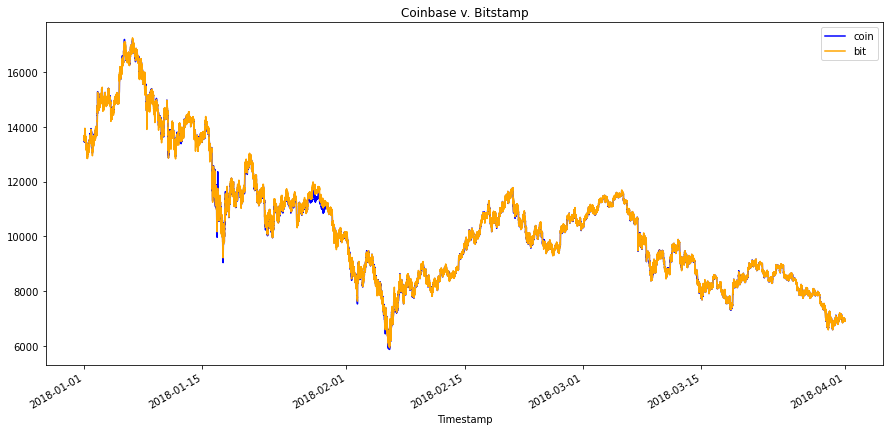

In [186]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase['Close'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="coin")
bitstamp['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

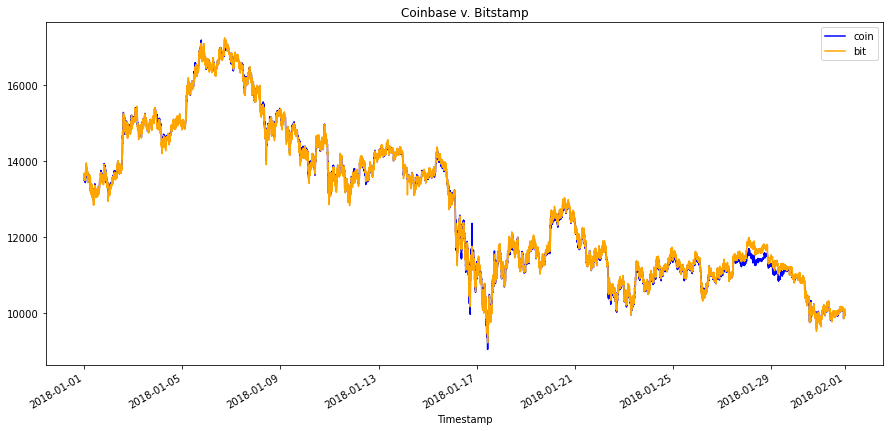

In [187]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
coinbase.loc["2018-01-01 00:00:00":"2018-02-01 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="coin")
bitstamp.loc["2018-01-01 00:00:00":"2018-02-01 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

<AxesSubplot:title={'center':'Coinbase v. Bitstamp'}, xlabel='Timestamp'>

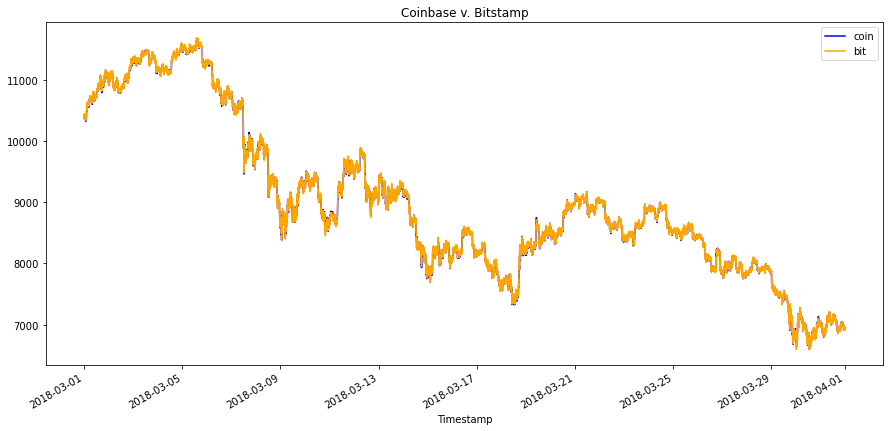

In [188]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
coinbase.loc["2018-03-01 00:00:00":"2018-04-01 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), title="Coinbase v. Bitstamp", color="blue", label="coin")
bitstamp.loc["2018-03-01 00:00:00":"2018-04-01 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** It looks like the spread has decreased as time goes on. Likely due to the increase of institutional arbitrage trading.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 28th, 2018'}, xlabel='Timestamp'>

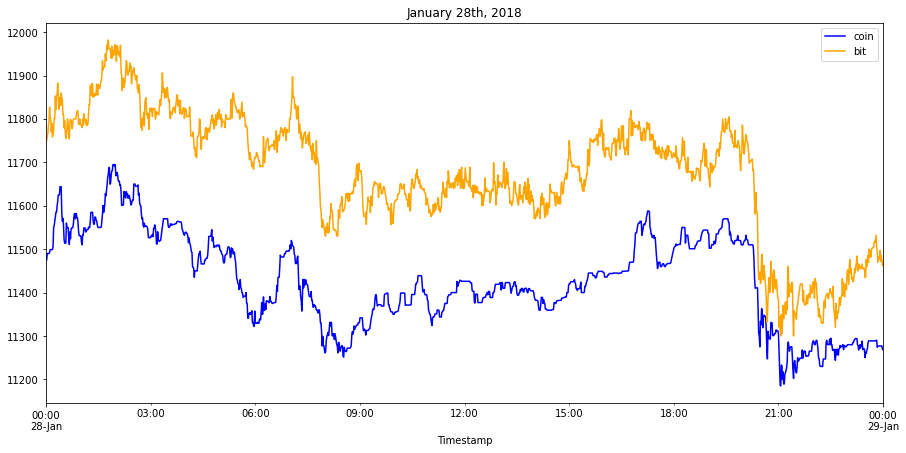

In [189]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), title="January 28th, 2018", color="blue", label="coin")
bitstamp.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

In [190]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00",'Close'] - coinbase.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00",'Close']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1437.000000
mean      247.520612
std        68.330248
min        55.030000
25%       209.910000
50%       251.170000
75%       290.900000
max       439.010000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - January 28th, 2018'}>

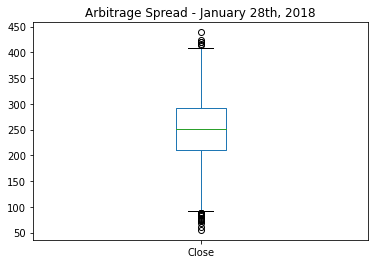

In [191]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box', title='Arbitrage Spread - January 28th, 2018')

<AxesSubplot:title={'center':'February 5th, 2018'}, xlabel='Timestamp'>

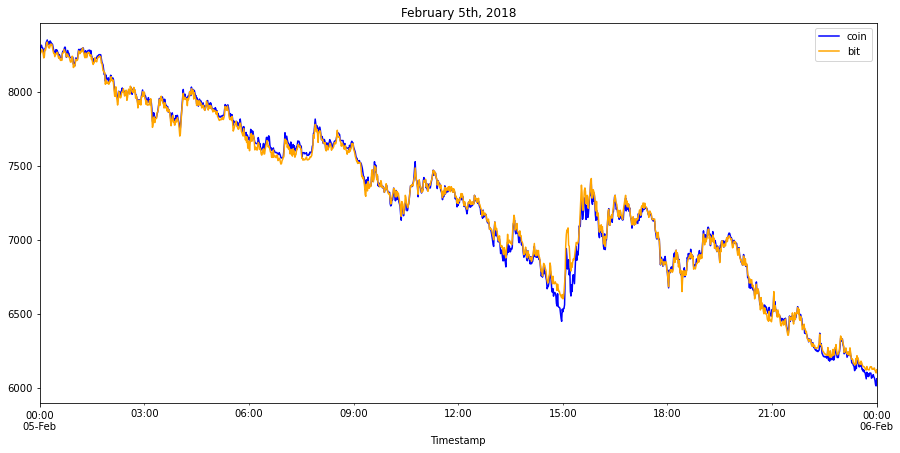

In [192]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), title="February 5th, 2018", color="blue", label="coin")
bitstamp.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

In [208]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00",'Close'] - coinbase.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00",'Close']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1441.000000
mean        1.295288
std        33.455023
min       -80.990000
25%       -19.560000
50%        -3.460000
75%        15.020000
max       254.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - February 5th, 2018'}>

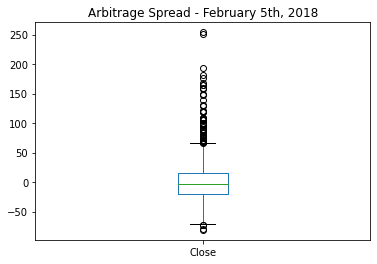

In [194]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'March 10th, 2018'}, xlabel='Timestamp'>

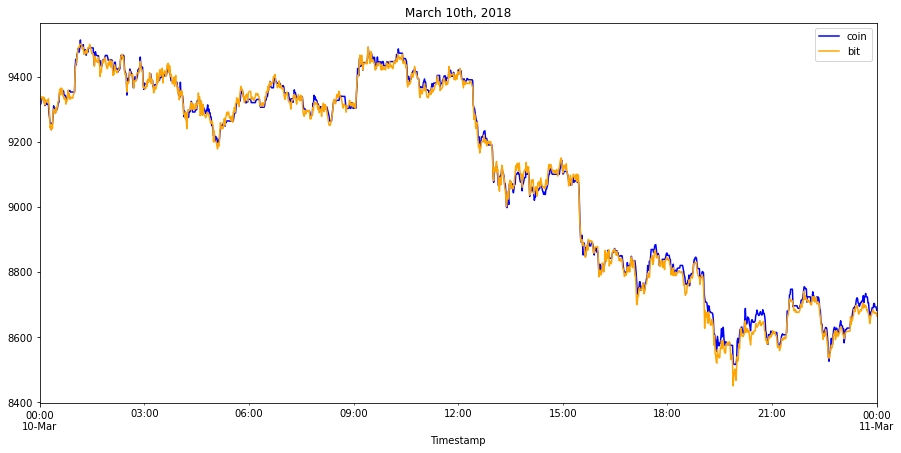

In [195]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
coinbase.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), title="March 10th, 2018", color="blue", label="coin")
bitstamp.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close'].plot(legend=True, figsize=(15, 7), color="orange", label="bit")

In [214]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close'] - bitstamp.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1434.000000
mean        6.548773
std        15.950503
min       -36.860000
25%        -4.235000
50%         7.190000
75%        16.062500
max        93.180000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - March 10th, 2018'}>

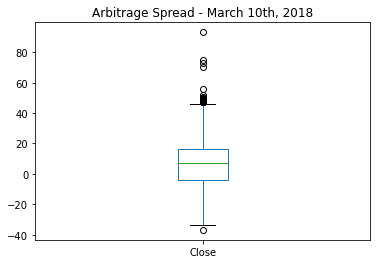

In [215]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box', title='Arbitrage Spread - March 10th, 2018')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [211]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00","Close"] - coinbase.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00","Close"]

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
filtered_arbitrage_spread_early = arbitrage_spread_early.loc[arbitrage_spread_early > 0]

# Get series statistics
filtered_arbitrage_spread_early.describe()

count    1437.000000
mean      247.520612
std        68.330248
min        55.030000
25%       209.910000
50%       251.170000
75%       290.900000
max       439.010000
Name: Close, dtype: float64

In [231]:
# For the date middle in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00",'Close'] - coinbase.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00",'Close']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
filtered_arbitrage_spread_middle = arbitrage_spread_middle.loc[arbitrage_spread_middle > 0]

# Get series statistics
filtered_arbitrage_spread_middle.describe()

count    626.000000
mean      28.070799
std       32.654946
min        0.010000
25%        8.002500
50%       18.560000
75%       33.872500
max      254.000000
Name: Close, dtype: float64

In [216]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close'] - bitstamp.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
filtered_arbitrage_spread_late = arbitrage_spread_late.loc[arbitrage_spread_late > 0]

# Get series statistics
filtered_arbitrage_spread_late.describe()

count    964.000000
mean      15.004056
std       11.343990
min        0.010000
25%        7.032500
50%       12.675000
75%       19.982500
max       93.180000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [229]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = filtered_arbitrage_spread_early / coinbase.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00","Close"]

# Review the spread return DataFrame
spread_return_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [232]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = filtered_arbitrage_spread_middle / coinbase.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00","Close"]

# Review the spread return DataFrame
spread_return_middle.head()

Timestamp
2018-02-05 00:00:00   NaN
2018-02-05 00:01:00   NaN
2018-02-05 00:02:00   NaN
2018-02-05 00:03:00   NaN
2018-02-05 00:04:00   NaN
Name: Close, dtype: float64

In [233]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = filtered_arbitrage_spread_late / bitstamp.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close']

# Review the spread return DataFrame
spread_return_late.head()

Timestamp
2018-03-10 00:00:00    0.000631
2018-03-10 00:01:00         NaN
2018-03-10 00:02:00         NaN
2018-03-10 00:03:00         NaN
2018-03-10 00:04:00         NaN
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [234]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-28 00:00:00    0.023999
2018-01-28 00:01:00    0.023965
2018-01-28 00:02:00    0.023392
2018-01-28 00:03:00    0.023936
2018-01-28 00:04:00    0.025610
Name: Close, dtype: float64

In [235]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Timestamp
2018-02-05 13:29:00    0.010345
2018-02-05 14:41:00    0.010523
2018-02-05 14:43:00    0.012529
2018-02-05 14:44:00    0.014504
2018-02-05 14:47:00    0.011269
Name: Close, dtype: float64

In [236]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Timestamp
2018-03-10 19:04:00    0.010801
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [237]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    1379.000000
mean        0.022198
std         0.005420
min         0.010087
25%         0.019011
50%         0.022190
75%         0.025412
max         0.038510
Name: Close, dtype: float64

In [238]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    52.000000
mean      0.017221
std       0.006374
min       0.010084
25%       0.012659
50%       0.015055
75%       0.020155
max       0.037211
Name: Close, dtype: float64

In [239]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    1.000000
mean     0.010801
std           NaN
min      0.010801
25%      0.010801
50%      0.010801
75%      0.010801
max      0.010801
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [246]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * coinbase.loc["2018-01-28 00:00:00":"2018-01-29 00:00:00","Close"]

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-28 00:00:00    275.38
2018-01-28 00:01:00    275.00
2018-01-28 00:02:00    268.77
2018-01-28 00:03:00    275.03
2018-01-28 00:04:00    294.26
Name: Close, dtype: float64

In [245]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase.loc["2018-02-05 00:00:00":"2018-02-06 00:00:00","Close"]

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Timestamp
2018-02-05 13:29:00    71.57
2018-02-05 14:41:00    70.08
2018-02-05 14:43:00    83.57
2018-02-05 14:44:00    96.00
2018-02-05 14:47:00    74.84
Name: Close, dtype: float64

In [247]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp.loc["2018-03-10 00:00:00":"2018-03-11 00:00:00",'Close']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()

Timestamp
2018-03-10 19:04:00    93.18
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [241]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count    1379.000000
mean      253.894322
std        62.051204
min       113.970000
25%       217.225000
50%       254.110000
75%       292.985000
max       439.010000
Name: Close, dtype: float64

In [248]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_middle.describe()

count     52.000000
mean     114.932115
std       43.461671
min       61.120000
25%       86.482500
50%      102.845000
75%      132.367500
max      254.000000
Name: Close, dtype: float64

In [249]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_late.describe()

count     1.00
mean     93.18
std        NaN
min      93.18
25%      93.18
50%      93.18
75%      93.18
max      93.18
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - January 28th, 2018'}, xlabel='Timestamp'>

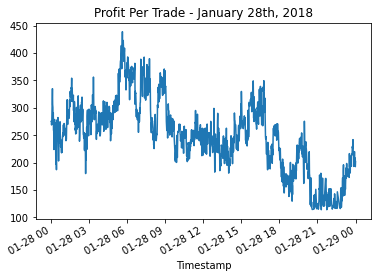

In [242]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title='Profit Per Trade - January 28th, 2018')

<AxesSubplot:title={'center':'Profit Per Trade - February 5th, 2018'}, xlabel='Timestamp'>

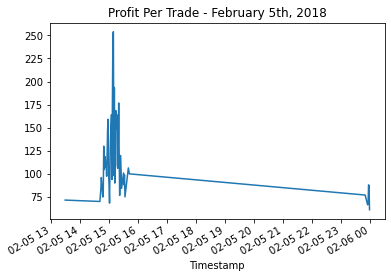

In [250]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_middle.plot(title='Profit Per Trade - February 5th, 2018')

<AxesSubplot:title={'center':'Profit Per Trade - March 10th, 2018'}, xlabel='Timestamp'>

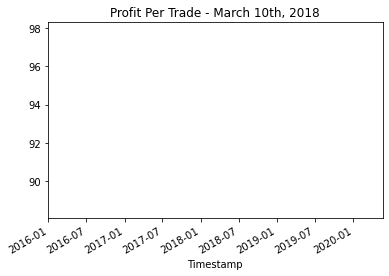

In [251]:
# Plot the results for the early profit per trade DataFrame
# Only one profitable trade for this date
profit_per_trade_late.plot(title='Profit Per Trade - March 10th, 2018')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [243]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

350120.27000000014

In [252]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_middle.sum()

5976.470000000004

In [253]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_late.sum()

93.18000000000029

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

<AxesSubplot:title={'center':'Profit Per Trade - January 28th, 2018'}, xlabel='Timestamp'>

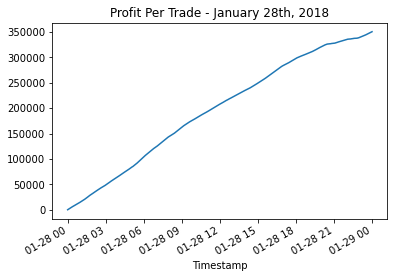

In [257]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early.plot(title='Profit Per Trade - January 28th, 2018')

<AxesSubplot:title={'center':'Profit Per Trade - February 5th, 2018'}, xlabel='Timestamp'>

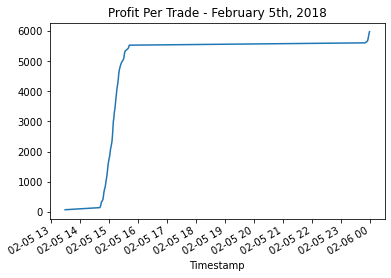

In [258]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(title='Profit Per Trade - February 5th, 2018')

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle.plot(title='Profit Per Trade - February 5th, 2018')

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

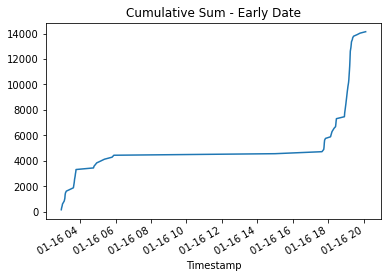

In [38]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** YOUR ANSWER HERE